In [7]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from joblib import externals
from sklearn import tree
import seaborn as sns
import pydot
import matplotlib.pyplot as plt
import pydotplus,graphviz
from IPython.display import Image  

Data preprocessing 

In [8]:
df=pd.read_csv("titanic-passengers.csv",sep=";")
df=df.drop(["PassengerId","Name", "Cabin","Embarked","Ticket"],axis=1)

dict1={
    "female":1,
    "male":0,
    "No":0,
    "Yes":1
}
df.replace(dict1, inplace=True)

df["Age"].fillna(df["Age"].mean(), inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


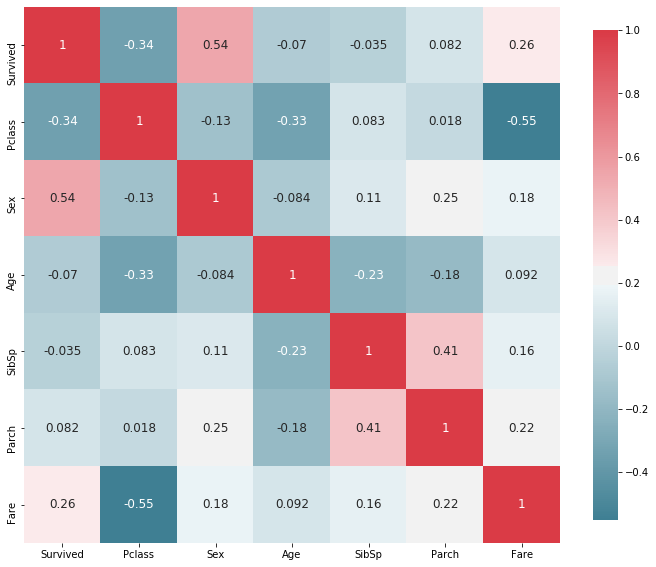

In [9]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )  


## splitting Data and training the model

In [10]:
X=df.drop(columns=['Survived']);
Y=df['Survived'];
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,  random_state=40)
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
# joblib.dump(model,'model_dt_titanic.joblib')
# model=joblib.load('model_dt_titanic.joblib')
pred=model.predict(X_test)
accuracy_1 = accuracy_score(Y_test,pred)
print('accuracy_1: ',accuracy_1)

accuracy_1:  0.8156424581005587


# data visualisation 

In [11]:
dot_data=tree.export_graphviz(model,out_file=None,feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'],class_names=['1','0'],label='all', rounded=True,filled=True)
#tree.export_graphviz(model,out_file='model_dt_titanic.dot',feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'],class_names=['1','0'],label='all', rounded=True,filled=True)

graph=graphviz.Source(dot_data)
graph.render("data", view=True)
(graph,) = pydot.graph_from_dot_file('model_dt_titanic.dot')
graph.write_png('model_dt_titanic.png')

this is the obtained tree 
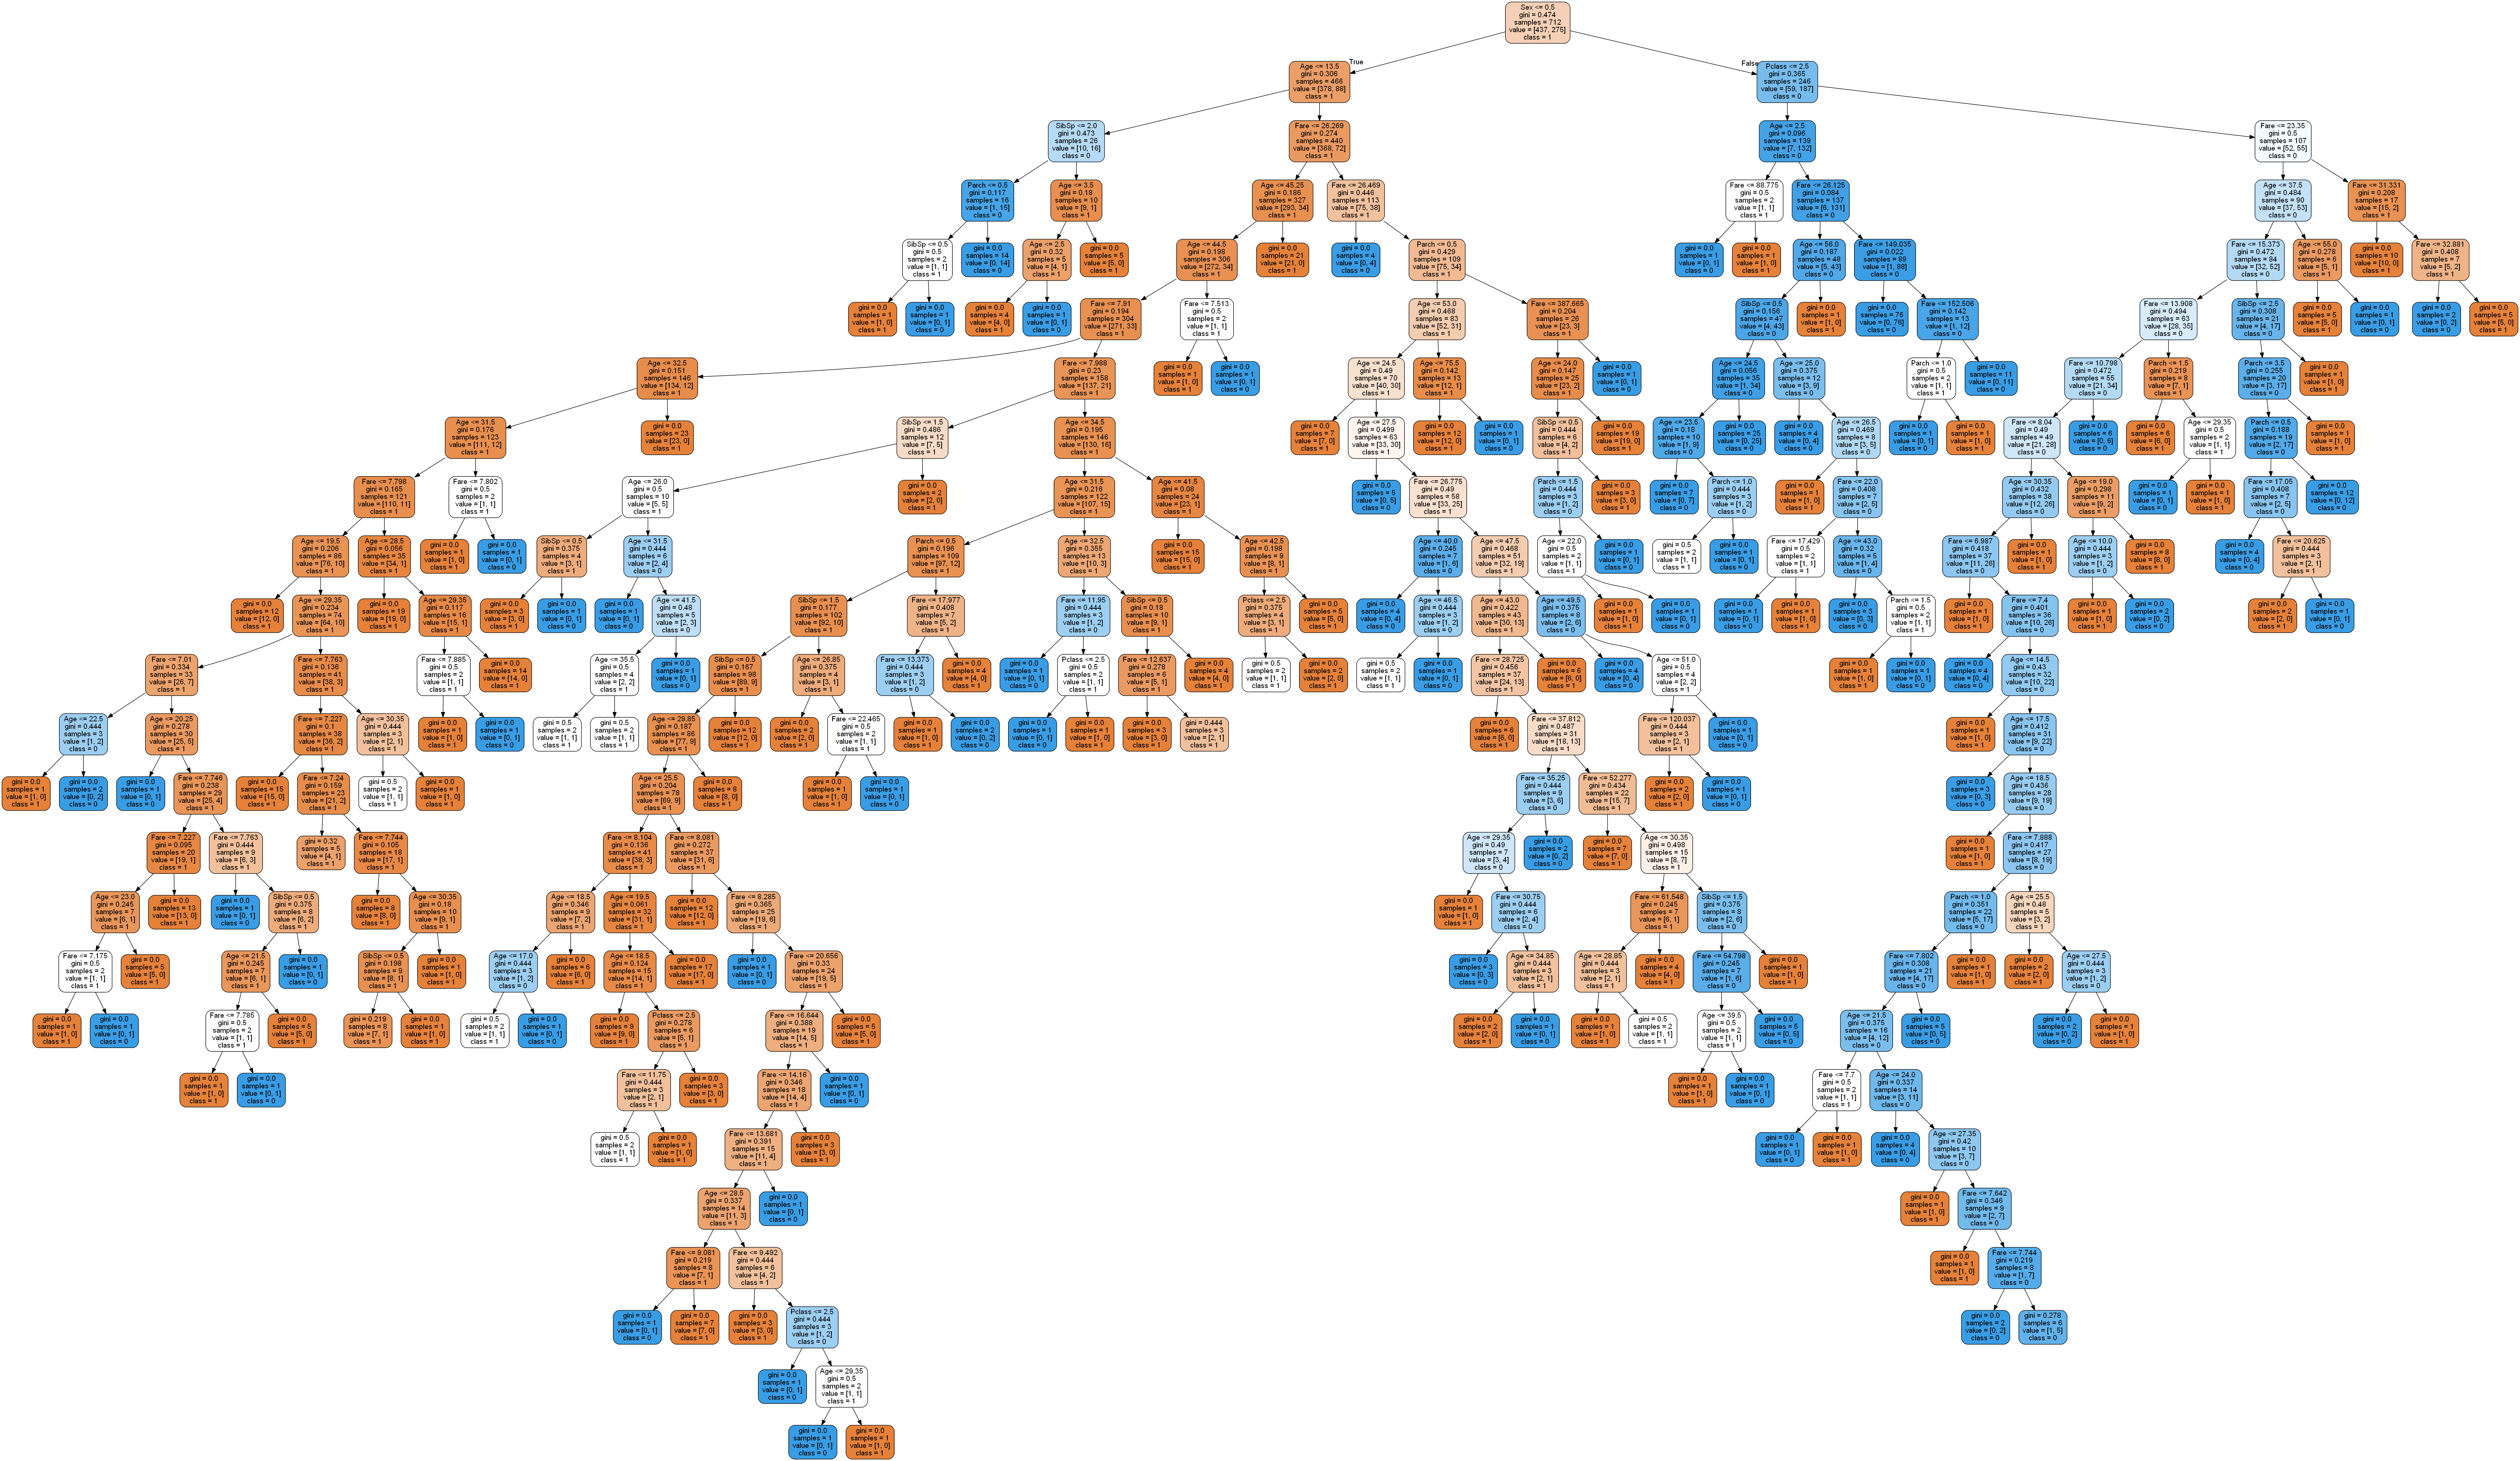


In [12]:
X1=df.drop(columns=['Survived','Parch', 'SibSp']);
Y1=df['Survived'];
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X1,Y1,test_size=0.20,  random_state=40)
model=DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
model.fit(X_train1,Y_train1)
#joblib.dump(model,'model_dt_titanic.joblib')
#model=joblib.load('model_dt_titanic.joblib')
pred1=model.predict(X_test1)
accuracy_2 = accuracy_score(Y_test1,pred1)
print('accuracy_2: ',accuracy_2)

accuracy_2:  0.8044692737430168


we changed the inputs by droppng Parch and SipSp they have very low correlation with the output 
we changed the decision tree parameters from gini to entropy criterion and random state from 0 to 10 the best obtained are 0.80

#  data visualisation 

In [13]:
dot_data1=tree.export_graphviz(model,out_file=None,feature_names=['Pclass','Sex','Age','Fare'],class_names=['1','0'],label='all', rounded=True,filled=True)
#tree.export_graphviz(model,out_file='model_dt_titanic1.dot',feature_names=['Pclass','Sex','Age','Fare'],class_names=['1','0'],label='all', rounded=True,filled=True)

graph=graphviz.Source(dot_data1)
graph.render("data1", view=True)
(graph,) = pydot.graph_from_dot_file('model_dt_titanic1.dot')
graph.write_png('model_dt_titanic1.png')

('accuracy_2: ', 0.8044692737430168)
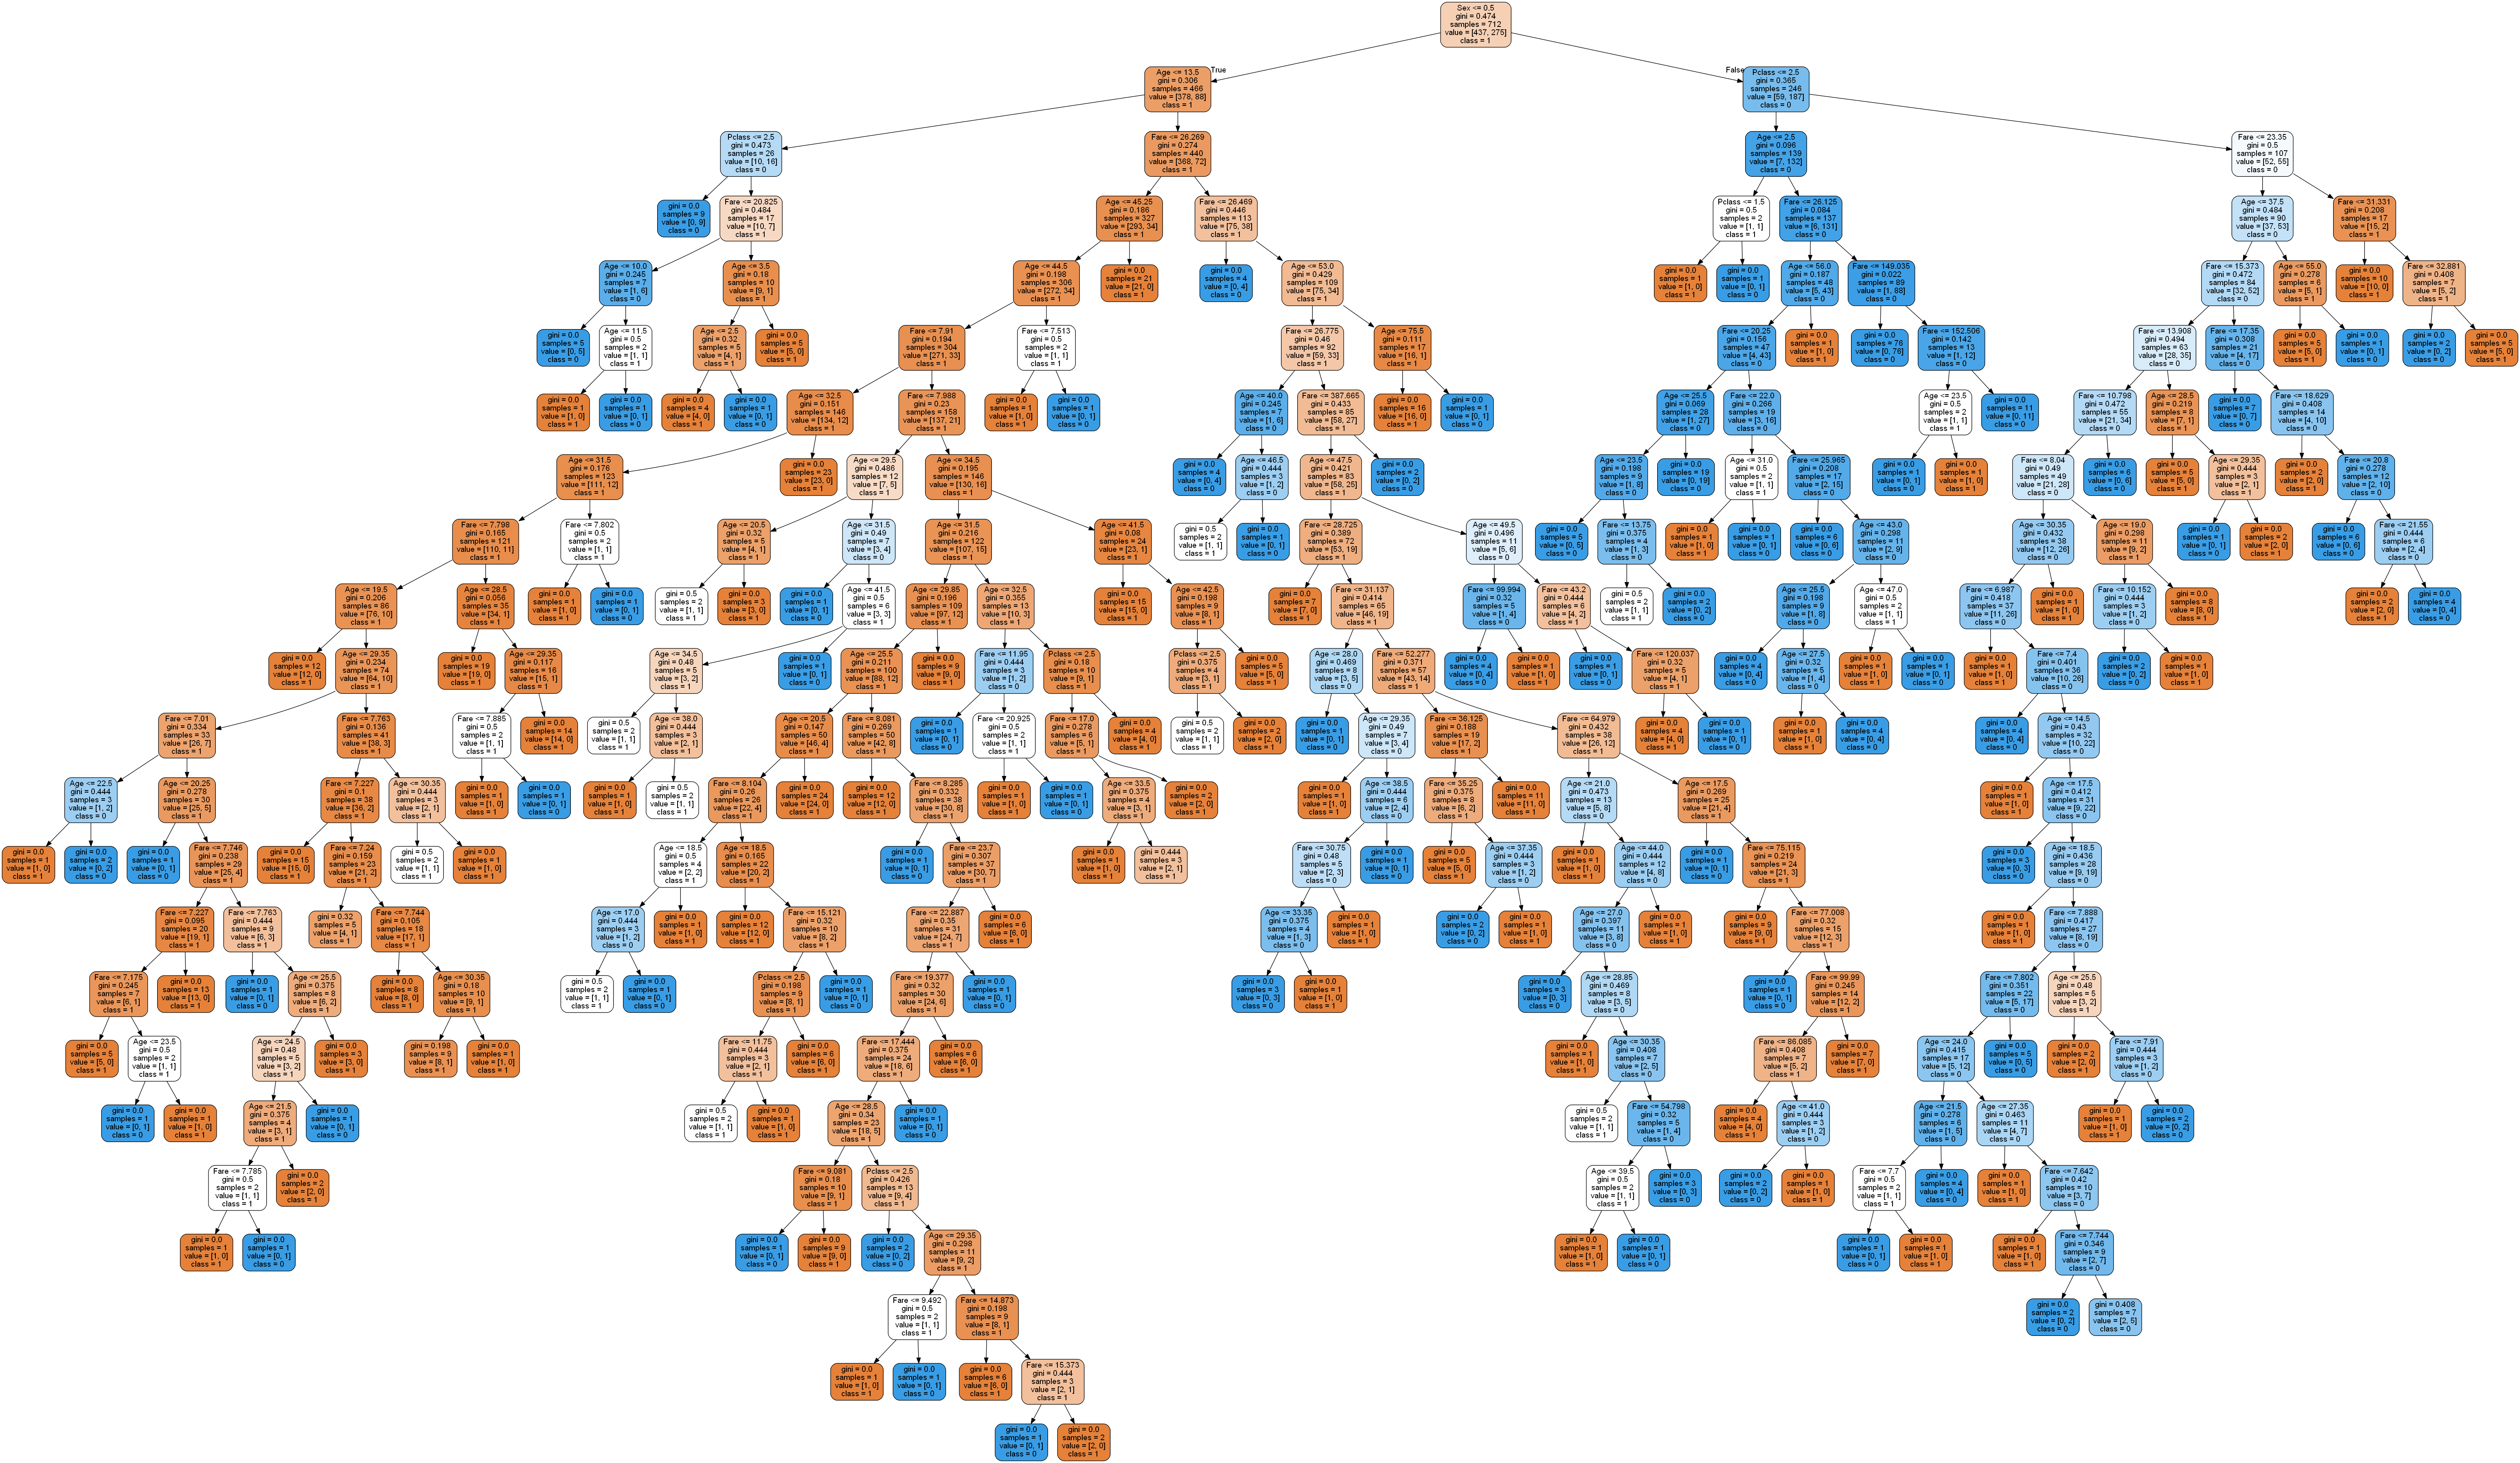

#  Random Forests 

In [18]:
from sklearn.ensemble import RandomForestClassifier
df=pd.read_csv("titanic-passengers.csv",sep=";")
df=df.drop(["PassengerId","Name", "Cabin","Embarked","Ticket",'SibSp','Parch'],axis=1)

dict1={
    "female":1,
    "male":0,
    "No":0,
    "Yes":1
}
df.replace(dict1, inplace=True)

df["Age"].fillna(df["Age"].mean(), inplace=True)



In [19]:
df

Survived  Pclass  Sex        Age     Fare
0           0       2    0  28.000000  13.0000
1           0       3    0  25.000000   7.6500
2           0       3    0  20.000000   7.8542
3           0       3    1  29.000000  21.0750
4           0       1    0  31.000000  52.0000
..        ...     ...  ...        ...      ...
886         1       2    1  14.000000  30.0708
887         0       3    0  22.000000   7.2292
888         0       3    1  30.000000   8.6625
889         0       3    0  29.699118   7.8958
890         1       2    1  19.000000  26.0000

[891 rows x 5 columns]

In [20]:
X2=df.drop(columns=['Survived']);
Y2=df['Survived'];
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X2,Y2,test_size=0.30,  random_state=40)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train2,Y_train2)
pred2=model.predict(X_test2)
accuracy_3 = accuracy_score(Y_test2,pred2)
print('accuracy_3: ',accuracy_3)

accuracy_3:  0.8656716417910447


n_estimators=100  --> 0.8656716417910447

In [21]:

X_train2,X_test2,Y_train2,Y_test2=train_test_split(X2,Y2,test_size=0.30,  random_state=40)
clf1=RandomForestClassifier(n_estimators=1000)
clf1.fit(X_train2,Y_train2)
pred3=model.predict(X_test2)
accuracy_31 = accuracy_score(Y_test2,pred3)
print('accuracy_31: ',accuracy_3)

accuracy_31:  0.8656716417910447


I found a better result with random forest  than with decision tree but changing the number of estimators didn't change the obtained accuracy